导入包的依赖

In [2]:
import numpy as np
import pandas as pd
import sklearn.datasets as sd
import sklearn.model_selection as sms
import matplotlib.pyplot as plt
import random

读取实验训练集和验证集

In [3]:
# 在下载时指定n_features为123
X,y = sd.load_svmlight_file('a9a.txt',n_features = 123)
# 将数据集切分为训练集和验证集
X_train, X_valid, y_train, y_valid = sms.train_test_split(X,y) 
#对稀疏矩阵进行类型转换
X_train = X_train.toarray()
X_valid = X_valid.toarray()
y_train = y_train.reshape(len(y_train),1)
y_valid = y_valid.reshape(len(y_valid),1)

X_train = np.concatenate((np.ones((X_train.shape[0],1)),X_train),axis = 1)
X_valid = np.concatenate((np.ones((X_valid.shape[0],1)),X_valid),axis = 1)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((24420, 124), (8141, 124), (24420, 1), (8141, 1))

定义sigmoid函数

In [4]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

定义logistic loss函数

In [5]:
def logistic_loss(X,y,theta):
    hx = sigmoid(X.dot(theta))
    cost = np.multiply((1+y),np.log(1+hx)) + np.multiply((1-y),np.log(1-hx))
    return -cost.mean()/2

计算当前的loss

In [6]:
theta = np.zeros((X_train.shape[1],1))
logistic_loss(X_train, y_train, theta)

0.4293812571995388

定义logistic gradient函数

In [7]:
def logistic_gradient(X,y,theta):
    return X.T.dot(sigmoid(X.dot(theta))-y)

定义logistic score函数

In [8]:
def logistic_score(X, y, theta):
    hx = sigmoid(X.dot(theta))
    hx[hx>=0.5] = 1
    hx[hx<0.5] = -1
    hx = (hx==y)
    return np.mean(hx)

定义logistic descent函数

In [9]:
def logistic_descent(X,y,theta,alpha,num_iters,batch_size,X_valid,y_valid):
    loss_train = np.zeros((num_iters,1))
    loss_valid = np.zeros((num_iters,1))
    data = np.concatenate((y,X),axis = 1)
    for i in range(num_iters):
        sample = np.matrix(random.sample(data.tolist(),batch_size))
        grad = logistic_gradient(sample[:,1:125],sample[:,0],theta)
        theta = theta - alpha * grad
        loss_train[i] = logistic_loss(X,y,theta)
        loss_valid[i] = logistic_loss(X_valid,y_valid,theta)
    return theta,loss_train,loss_valid

确定batch_size的大小，执行梯度下降

In [10]:
theta = np.zeros((X_train.shape[1],1))
alpha = 0.0001
num_iters = 6
opt_theta,loss_train,loss_valid = logistic_descent(X_train,y_train,theta,alpha,num_iters,64,X_valid,y_valid)
loss_train.max(),loss_train.min(),loss_valid.max(),loss_valid.min()

(0.4138235928516454,
 0.34510826773059505,
 0.4107305859229226,
 0.3423352257273308)

计算得到Lvalidation

In [11]:
print("Lvalidation")
logistic_score(X_valid,y_valid,opt_theta)

Lvalidation


0.7570323056135609

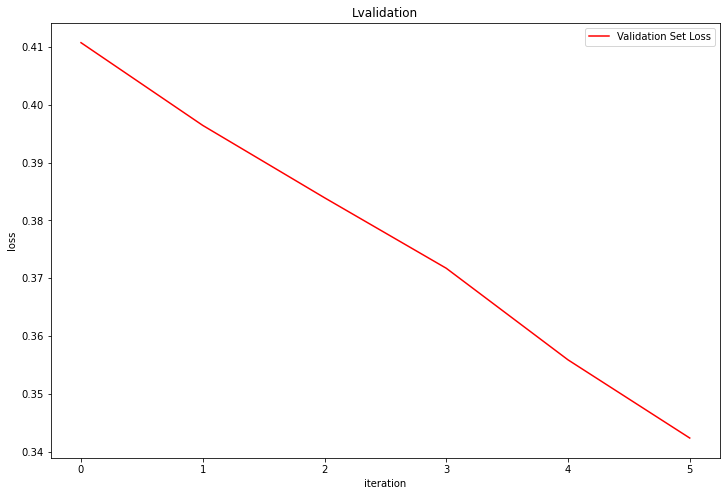

In [12]:
iteration = np.arange(0,num_iters,step = 1)
fig,ax = plt.subplots(figsize = (12,8))
ax.set_title('Lvalidation')
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
# plt.plot(iteration,loss_train,'b',label='Training Set Loss')
plt.plot(iteration,loss_valid,'r',label='Validation Set Loss')
plt.legend()
plt.show()